<hr style="border:0.1px solid gray">

# <center style='color:Red'> COSC2753 - Machine Learning </center> 
## <center style='color:Red'> Assignment 2 - Classify Images of Colon Cancer </center>

**Group Number:** 8

**Student 1:** Ngo Quang Khai - s3836387 

**Student 2:** Nguyen Quoc Minh - s3758994

**Student 3:** Bui Thanh Huy - s3740934

**Student 4:** Tran Vinh Khang - s3855823

**Student 5:** Le Trong Hung - s3805504

**Lecturer:** Dr. Bao Nguyen

**Due Date:** May 14th, 2021

<hr style="border:0.1px solid gray">

# Main Task

- **Task 1**: Classify images according to whether given cell image represents a cancerous cells or not (isCancerous)


- **Task 2**: Classify images according to cell-type, such as: fibroblast, inflammatory, epithelial or others.


- **Extra task**:

# 1. Import libraries and setting up environment

In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install opencv-python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from tqdm import tqdm

import cv2
import os
import tensorflow as tf
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')


#It is important to check the version of these libraries to make sure that implement the latest method.
print('Tensorflow version:', tf.__version__)
print('CV2 version:', cv2.__version__)

Tensorflow version: 2.6.0
CV2 version: 4.5.5


# 2. Import Dataset

In [3]:
# Import data_labels_mainData.csv into a DataFrame
main_data = pd.read_csv('data_labels_mainData.csv')

# Import data_labels_extraData.csv into a DataFrame
extra_data = pd.read_csv('data_labels_extraData.csv')

# 3. Exploratory Data Analysis (EDA)

## 3.1. Process the data

In [4]:
#See the data frame of main_data
print("Dataframe of main_data: \n", main_data, "\n")

#See the data frame of extra_data
print("Dataframe of extra_data: \n", extra_data)

Dataframe of main_data: 
       InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0          22405          1  22405.png   fibroblast         0            0
1          22406          1  22406.png   fibroblast         0            0
2          22407          1  22407.png   fibroblast         0            0
3          22408          1  22408.png   fibroblast         0            0
4          22409          1  22409.png   fibroblast         0            0
...          ...        ...        ...          ...       ...          ...
9891        1625         60   1625.png   epithelial         2            1
9892        1626         60   1626.png   epithelial         2            1
9893        1627         60   1627.png   epithelial         2            1
9894        1628         60   1628.png   epithelial         2            1
9895        1629         60   1629.png   epithelial         2            1

[9896 rows x 6 columns] 

Dataframe of extra_data: 
        InstanceID  p

**=>** Next, we will check if the data have any null values and datatype of each columns.

In [5]:
main_data.info()
main_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

In [6]:
extra_data.info()
extra_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


InstanceID     0
patientID      0
ImageName      0
isCancerous    0
dtype: int64

**=>** Since our data is no missing/null value and properly formatted, we will move on to analyzing data.

## 3.2. Data Analysis and Visualiztion

Based on the information provided by the biomedical company as well as the DataFrames in **section 3.1** above. We are aware of:
- The **main_data** contains both **cellType (0 to 3)** and **isCancerous (0 and 1)** columns. In there, **cellType** values 0 to 3 represent fibroblast, inflammatory, epithelial, and miscellaneous cell types respectively based on the **cellTypeName** column. In addition, **isCancerous** values 0 and 1 represent colon cells with non-Cancer and Cancer.


- The **extra_data** only contains **isCancerous (0 and 1)** column.

**=>** Therefore, we choose the **isCancerous** attribute as the target column because both **main_data** and **extra_data** have the column **isCancerous**.

### 3.2.1. Correlation and Correlation Matrix

Firstly, we will draw the correlation matrix to find out any relationship between **isCancerous** column with the others
columns in **main_data**.

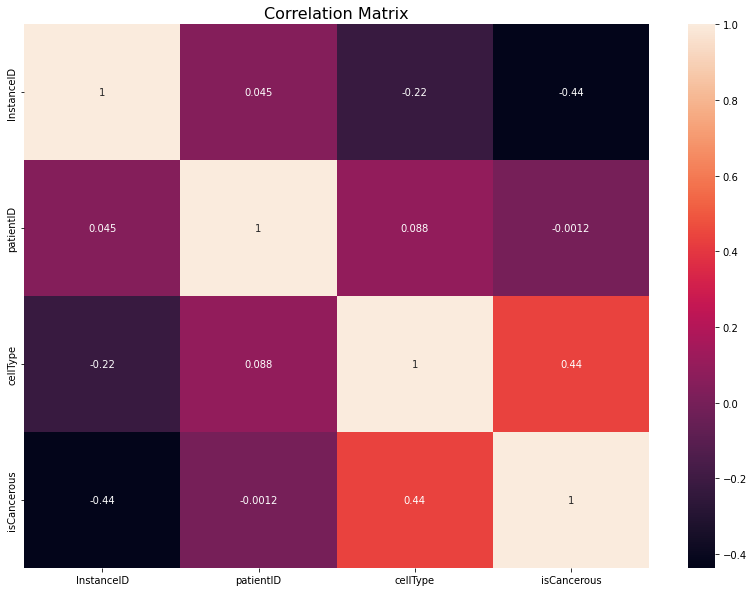

In [7]:
f = plt.figure(figsize=(14, 10))
plt.title('Correlation Matrix', fontsize=16);
sns.heatmap(main_data.corr(), annot = True)
plt.show()

**Analysis**

As we can see from the matrix above, most of the attributes do not correlate with **isCancerous** much are **InstanceID** (-0.44), **patientID** (-0.0012). Since these attributes do not affect much to isCancerous attribute, we will not use these attributes to train our model. Applying these two attributes to train the model can cause noise and overcomplicated issue to our prediction model.

**=>** There is only attribute **cellType** with 0.44 has high impact on the attribute 'isCancerous'

### 3.2.2. Data Distribution

### Countplot

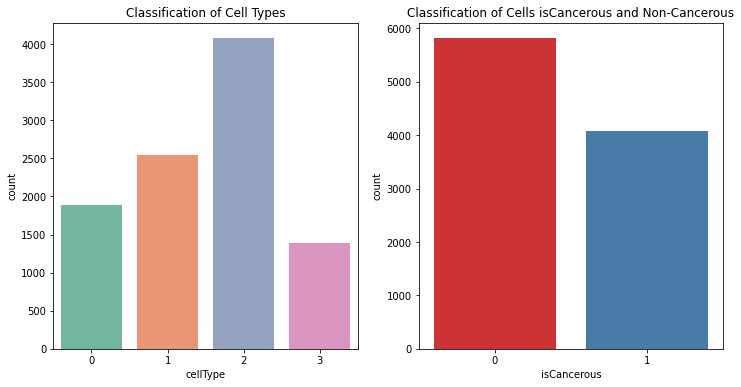

In [8]:
#Using the countplot to see the classification of cellType and isCancerous 
fig, ax =plt.subplots(1,2, figsize = (12,6))

# 0 = fibroblast, 1 = imflammatory, 2 = epithelial, 3 = others
sns.countplot(main_data['cellType'], palette='Set2', ax=ax[0]).set_title("Classification of Cell Types")

sns.countplot(main_data['isCancerous'], palette='Set1', ax=ax[1]).set_title("Classification of Cells isCancerous and Non-Cancerous")
fig.show()

**Analysis**
- The first countplot shows us there 4 different types of cell: 0, 1, 2, 3. The first type of cell is 0 has approximately 1900, the second type of cell is 2 has approximately 2600, the third one is 4100 and last one is 1500.


- The second countplot shows us number of cells that are cancer and not. In the first column is 0 represent the cell that are not cancerous, and 1 represent the cell that are cancerous. There are approximately 5900 cells that are not cancerous and 4200 cells that are cancerous in our data.

### Histogram

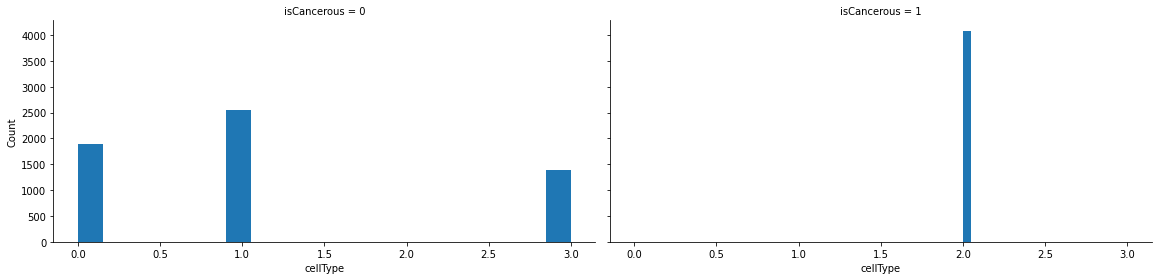

In [9]:
# Draw the histogram for cellType respected to isCancerous (class 0 and 1)
g = sns.FacetGrid(main_data, col='isCancerous', height=4, aspect=2)
g.map(plt.hist, str('cellType'), bins=20)
g.set_axis_labels('cellType', "Count")

**Analysis**

Looking at these two histograms, we can see that 'cellType' 0, 1, and 3 are not cancerous. Meanwhile only 'cellType' 2 is cancerous.

In [10]:
# Apply loc to make sure
main_data.loc[(main_data['cellType'] == 2) & (main_data['isCancerous'] == 1)]

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
449,276,5,276.png,epithelial,2,1
450,277,5,277.png,epithelial,2,1
451,278,5,278.png,epithelial,2,1
452,279,5,279.png,epithelial,2,1
453,280,5,280.png,epithelial,2,1
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


### Conclusion

- In **main_data**, only the attribute **cellType** continue to be our strongest candidate for to influence our model when it has high impact on our target attribute is **isCancerous**.


- Attributes such as **InstanceID** and **patientID** might create a lot of noise in our model. 


- There are 4 types of cells: 0, 1, 2, 3. Only cell type number 2 is cancerous while others are not cancerous.


- We expect the the model would predict class 0 more accurately than class 1

## 3.3. Data Preparation

In [11]:
from sklearn.model_selection import train_test_split

#splitting data into train and validation 
train_task1, val_task1 = train_test_split(main_data[['ImageName', 'isCancerous']], 
                                              test_size=0.3, random_state=9)


train_task2, val_task2 = train_test_split(main_data[['ImageName','cellType']], 
                                              test_size=0.3, random_state=9)                                        

print('Training data shape task 1:', train_task1.shape)
print('Validation data shape task 1:', val_task1.shape)

print('Training data shape task 2:', train_task2.shape)
print('Validation data shape task 2:', val_task2.shape)

Training data shape task 1: (6927, 2)
Validation data shape task 1: (2969, 2)
Training data shape task 2: (6927, 2)
Validation data shape task 2: (2969, 2)


In [12]:
#Create a a function to add image according to the name given from the list
from PIL import Image
def GetImage(directory):
    images=[]
    for name in tqdm(directory, desc="Adding images"):
        image = cv2.imread("patch_images/"+name)
        image = Image.fromarray(image,'RGB')
        images.append(np.array(image))
    result = np.array(images)
    print("\ngetImage COMPLETED!")
    return result



In [13]:
#Create a function to generate sample to fix the Imblance of the dataset
from imblearn.over_sampling import RandomOverSampler
def GenerateSample(X,Y):
    ros = RandomOverSampler(random_state = 1)
    x, y = ros.fit_resample(X.values.reshape(-1,1), Y)
    x = x.flatten()
    return x,y

In [14]:
x1_train = train_task1['ImageName']
y1_train = train_task1['isCancerous']
print("Original Dataset:\n",y1_train.value_counts())

#Generate sample
x1_train, y1_train = GenerateSample(x1_train,y1_train)
print("Sampled Dataset:\n",y1_train.value_counts())
x1_train = GetImage(x1_train)

x1_test = val_task1['ImageName']
x1_test = GetImage(x1_test)

y1_test = val_task1['isCancerous']


Original Dataset:
 0    4030
1    2897
Name: isCancerous, dtype: int64
Sampled Dataset:
 0    4030
1    4030
Name: isCancerous, dtype: int64


Adding images: 100%|█████████████████████████████████████████████████████████████| 8060/8060 [00:03<00:00, 2594.61it/s]



getImage COMPLETED!


Adding images: 100%|█████████████████████████████████████████████████████████████| 2969/2969 [00:01<00:00, 2795.45it/s]


getImage COMPLETED!


In [15]:
x2_train = train_task2['ImageName']
y2_train = train_task2['cellType']
print("Original Dataset:\n",y2_train.value_counts())

#Generate sample
x2_train, y2_train = GenerateSample(x2_train,y2_train)
print("Sampled Dataset:\n",y2_train.value_counts())
x2_train = GetImage(x2_train)

x2_test = val_task2['ImageName']
x2_test = GetImage(x2_test)

y2_test = val_task2['cellType']

x2_test,x2_val,y2_test,y2_val = train_test_split(x2_test, y2_test,
                                              test_size=0.5, random_state=9)

Original Dataset:
 2    2897
1    1778
0    1302
3     950
Name: cellType, dtype: int64
Sampled Dataset:
 1    2897
2    2897
3    2897
0    2897
Name: cellType, dtype: int64


Adding images: 100%|███████████████████████████████████████████████████████████| 11588/11588 [00:01<00:00, 6043.11it/s]



getImage COMPLETED!


Adding images: 100%|█████████████████████████████████████████████████████████████| 2969/2969 [00:00<00:00, 6168.75it/s]



getImage COMPLETED!


In [16]:
print("TASK 1 SHAPE:")
print("TRAIN SHAPE:")
print("x1 shape:", x1_train.shape)
print("y1 shape:", y1_train.shape)
print("TEST SHAPE:")
print("x1 shape:", x1_test.shape)
print("y1 shape:", y1_test.shape)

print("TASK 2 SHAPE:")
print("x1 shape:", x2_train.shape)
print("y1 shape:", y2_train.shape)
print("VALIDATION SHAPE:")
print("x1 shape:", x2_val.shape)
print("y1 shape:", y2_val.shape)
print("TEST SHAPE:")
print("x1 shape:", x2_test.shape)
print("y1 shape:", y2_test.shape)

TASK 1 SHAPE:
TRAIN SHAPE:
x1 shape: (8060, 27, 27, 3)
y1 shape: (8060,)
TEST SHAPE:
x1 shape: (2969, 27, 27, 3)
y1 shape: (2969,)
TASK 2 SHAPE:
x1 shape: (11588, 27, 27, 3)
y1 shape: (11588,)
VALIDATION SHAPE:
x1 shape: (1485, 27, 27, 3)
y1 shape: (1485,)
TEST SHAPE:
x1 shape: (1484, 27, 27, 3)
y1 shape: (1484,)


In [17]:
X2_train_scaled = x2_train / 255
X2_val_scaled = x2_val / 255
X2_test_scaled = x2_test / 255


In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.config.experimental.list_physical_devices()

In [19]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(27,27,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [20]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(512, kernel_regularizer=l2(l=0.01), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(512, kernel_regularizer=l2(l=0.01), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])




In [21]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005, beta_1=0.4, beta_2=0.444, decay=1.0e-6, amsgrad=True)
model.compile(optimizer=opt , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001, patience=10, verbose=1, mode='auto'),
    tf.keras.callbacks.ModelCheckpoint(
    filepath="task2/task2_weights.{epoch:02d}-valloss.{val_loss:.2f}.h5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=6, min_lr=0.5e-15) 
]

EPOCHS = 500
BATCH_SIZE = 32

import time
start_time = time.time()

with tf.device('/GPU:0'): 
    history = model.fit(X2_train_scaled, y2_train,
                    validation_data=(X2_val_scaled, y2_val), 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, 
                    verbose=1,
                    callbacks=my_callbacks)

print("---  Training time in seconds ---%s " % (time.time() - start_time))

Epoch 1/500
363/363 [==============================] - 26s 17ms/step - loss: 12.1429 - accuracy: 0.5258 - val_loss: 11.3676 - val_accuracy: 0.5111
Epoch 2/500
363/363 [==============================] - 5s 15ms/step - loss: 10.1205 - accuracy: 0.5801 - val_loss: 9.1390 - val_accuracy: 0.6660
Epoch 3/500
363/363 [==============================] - 5s 15ms/step - loss: 8.7423 - accuracy: 0.5929 - val_loss: 7.9272 - val_accuracy: 0.7125
Epoch 4/500
363/363 [==============================] - 5s 15ms/step - loss: 7.6712 - accuracy: 0.6118 - val_loss: 7.0020 - val_accuracy: 0.7219
Epoch 5/500
363/363 [==============================] - 5s 15ms/step - loss: 6.7973 - accuracy: 0.6219 - val_loss: 6.2674 - val_accuracy: 0.7131
Epoch 6/500
363/363 [==============================] - 6s 15ms/step - loss: 6.0644 - accuracy: 0.6335 - val_loss: 5.6393 - val_accuracy: 0.7044
Epoch 7/500
363/363 [==============================] - 6s 16ms/step - loss: 5.4827 - accuracy: 0.6409 - val_loss: 5.0906 - val_accur

363/363 [==============================] - 5s 15ms/step - loss: 1.0433 - accuracy: 0.7494 - val_loss: 1.0731 - val_accuracy: 0.7461
Epoch 58/500
363/363 [==============================] - 5s 15ms/step - loss: 1.0352 - accuracy: 0.7460 - val_loss: 1.1328 - val_accuracy: 0.7232
Epoch 59/500
363/363 [==============================] - 5s 15ms/step - loss: 1.0189 - accuracy: 0.7513 - val_loss: 1.0746 - val_accuracy: 0.7360
Epoch 60/500
363/363 [==============================] - 5s 15ms/step - loss: 1.0127 - accuracy: 0.7459 - val_loss: 1.1075 - val_accuracy: 0.7293
Epoch 61/500
363/363 [==============================] - 5s 15ms/step - loss: 0.9957 - accuracy: 0.7499 - val_loss: 1.0458 - val_accuracy: 0.7407
Epoch 62/500
363/363 [==============================] - 5s 15ms/step - loss: 0.9962 - accuracy: 0.7471 - val_loss: 1.0820 - val_accuracy: 0.7293
Epoch 63/500
363/363 [==============================] - 5s 15ms/step - loss: 0.9775 - accuracy: 0.7550 - val_loss: 1.0380 - val_accuracy: 0.736

363/363 [==============================] - 5s 15ms/step - loss: 0.7031 - accuracy: 0.8045 - val_loss: 0.8224 - val_accuracy: 0.7636
Epoch 114/500
363/363 [==============================] - 5s 15ms/step - loss: 0.7046 - accuracy: 0.8050 - val_loss: 0.8238 - val_accuracy: 0.7677
Epoch 115/500
363/363 [==============================] - 5s 15ms/step - loss: 0.7101 - accuracy: 0.8031 - val_loss: 0.8186 - val_accuracy: 0.7697
Epoch 116/500
363/363 [==============================] - 5s 15ms/step - loss: 0.7005 - accuracy: 0.8092 - val_loss: 0.8204 - val_accuracy: 0.7657
Epoch 117/500
363/363 [==============================] - 5s 15ms/step - loss: 0.7089 - accuracy: 0.7995 - val_loss: 0.8147 - val_accuracy: 0.7704
Epoch 118/500
363/363 [==============================] - 5s 15ms/step - loss: 0.7035 - accuracy: 0.8024 - val_loss: 0.8305 - val_accuracy: 0.7596
Epoch 119/500
363/363 [==============================] - 5s 15ms/step - loss: 0.6980 - accuracy: 0.8070 - val_loss: 0.8144 - val_accuracy:

In [26]:
 model.load_weights("task2/task2_weights.101-0.81.h5")

47/47 [==============================] - 0s 3ms/step - loss: 0.8074 - accuracy: 0.7785
Validation loss: 0.8073897361755371
Validation accuracy: 0.7784512042999268
Max Validation accuracy: 0.8091991543769836


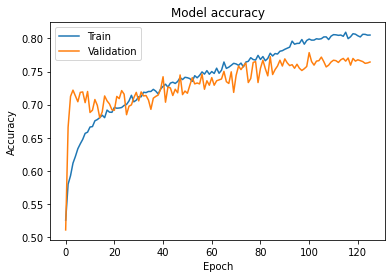

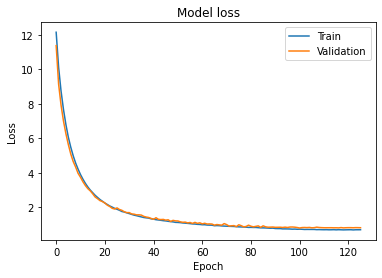

In [27]:

scores = model.evaluate(X2_val_scaled, y2_val, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])
print('Max Validation accuracy:', max(history.history['accuracy']))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
from sklearn.metrics import classification_report
predict=model.predict(X2_test_scaled)
classes=np.argmax(predict,axis=1)

print(classification_report(y2_test, classes))


              precision    recall  f1-score   support

           0       0.64      0.82      0.72       292
           1       0.86      0.65      0.74       384
           2       0.86      0.95      0.90       607
           3       0.64      0.48      0.55       201

    accuracy                           0.78      1484
   macro avg       0.75      0.72      0.73      1484
weighted avg       0.79      0.78      0.78      1484



In [ ]:
class_names = ["fibroblast","inflammatory","epithelial","others"]

In [ ]:
import numpy as np
batch_predict = model.predict (X2_test_scaled)
plt.figure(figsize=(15, 15))

for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    first_image = X2_test_scaled[i]
    first_label = int(y2_test.iloc[i])
    plt.imshow(first_image)
    confidence = round(100 * (np.max(batch_predict[i][0])), 2)
    actual_class= class_names[first_label]
    predicted_class = class_names[np.argmax(batch_predict[i])]
    
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
    